# Transformación de datos

En estadística, la transformación de datos se utiliza para ajustar valores de una variable a una distribución normal. Los datos se pueden transformar usando por ejemplo la raíz cuadrada o el logaritmo para asegurarse que los datos se ajusten a los supuestos de los modelos. Con la transformación, podemos mejorar el rendimiento del modelo que vayamos a utilizar.

### Determinación del sesgo o asimetría

Las medidas de skewness (sesgo o asimetría) son indicadores que permiten establecer el grado de sesgo que presenta una distribución de probabilidad de una variable aleatoria. Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por tanto, el mismo número de desviaciones con signo positivo que con signo negativo.

La función "skew" nos da una medida de en qué dirección está desbalanceada la distribución y la función "kurt" del grado de desbalanceo (cómo es de "afilada")

No hay una regla rígida para el valor de *skewness* pero normalmente se puede utilizar:
| **Valor de Skewness**  | **Interpretación**                                |
|------------------------|---------------------------------------------------|
| **[0, 0]**             | Distribución **simétrica** (sin sesgo).           |
| **(-0.5, 0.5)**        | **Sesgo leve o moderado**, distribución casi simétrica. |
| **(-1, -0.5)**         | **Sesgo a la izquierda moderado** (cola a la izquierda). |
| **(-∞, -1)**           | **Sesgo fuerte a la izquierda** (cola a la izquierda muy pronunciada). |
| **(0.5, 1)**           | **Sesgo a la derecha moderado** (cola a la derecha). |
| **(1, ∞)**             | **Sesgo fuerte a la derecha** (cola a la derecha muy pronunciada). |

 skewness: -1.194570307262883
 kurtosis: 0.9412265624999989


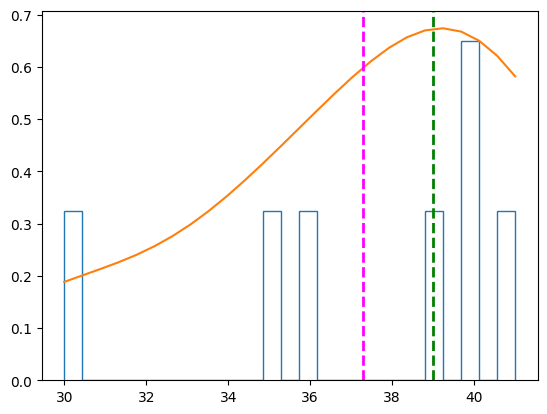

In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})

hours = df['Hours']
density = stats.gaussian_kde(hours)  #función de la librería Scipy, se utiliza para estimar cómo se distribuyen los datos en el espacio continuo
n, x, _ = plt.hist(hours, histtype='step', density=True, bins=25)  
"""como density está a True el histograma se normaliza y la altura de cada barra no es la cantidad de datos del bin, sino 
una densidad, que se calcula de tal manera que el área total debajo de todas las barras sea igual a 1 (representa qué tan 
probable es que un valor caiga dentro de un intervalo específico). 
En este ejemplo aunque tenemos establecidos 25 bins solo se muestran 6 valores porque matplotlib 
solo muestra las posiciones de los bins que tienen datos. 
"""
plt.plot(x, density(x)*7)   #multiplicamos por 7 para ajustar la escala para que coincida con la altura de las barras del histograma
plt.axvline(hours.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(hours.median(), color='green', linestyle='dashed', linewidth=2)

print(' skewness: ' + str(hours.skew()))
print(' kurtosis: ' + str(hours.kurt()))

plt.show()

### Transformaciones raíz, potencia y logaritmo

Para los casos en que los datos tienen sesgo moderado, pueden utilizarse transformaciones de este tipo para modificar la forma de la distribución, esto es útil cuando se desea aplicar ciertos modelos estadísticos que asumen que los datos siguen una distribución normal. 

| **Transformación**       | **Uso Principal**                         | **Efecto en los Datos**                                                                 |
|--------------------------|-------------------------------------------|-----------------------------------------------------------------------------------------|
| **Raíz cuadrada (√x)**   | Para **sesgo a la derecha** moderado      | Comprime los valores grandes, estabiliza la varianza.                                    |
| **Raíz cúbica (³√x)**    | Para **sesgo a la derecha** fuerte o moderado | Comprime moderadamente los valores grandes, especialmente útil si hay valores negativos. |
| **Logaritmo (log)**      | Para **sesgo a la derecha** fuerte (cola larga) | Comprime fuertemente los valores grandes, hace los datos más simétricos. **Se requiere agregar una constante** si hay valores no positivos. |
| **Potencia (x^n)**       | Para **sesgo a la izquierda** o **derecha** moderado | Ajusta la asimetría dependiendo del valor de **n**. Si **n** > 1: hace que los valores más grandes crezcan más rápido que los pequeños, si **n** < 1: comprime los valores grandes, hace que se acerquen más a los pequeños. |
| **Cuadrado (x²)**        | Para **sesgo a la izquierda** moderado    | Eleva al cuadrado los valores, convirtiendo los valores negativos en positivos. **Aumenta la dispersión en el lado derecho** y puede reducir el sesgo a la izquierda o convertirlo en sesgo a la derecha. |


La constante es simplemente un valor positivo que sumas a todos los datos del conjunto para asegurarte de que los valores sean siempre positivos. Normalmente eliges una constante lo suficientemente grande como para convertir cualquier valor negativo o cero en un número positivo sin distorsionar demasiado la distribución.

La función *kurt()* de pandas por defecto utiliza la fórmula estándar para calcular la kurtosis, que es la kurtosis cruda. Esta fórmula no ajusta el valor, por lo que en el caso de una distribución normal, el valor de la kurtosis será 3. En otros contextos si se trabaja con exceso de kurtosis el valor sería 0.

- **Kurtosis ≈ 3** (sin exceso) o **Kurtosis ≈ 0** (exceso de kurtosis): **Distribución normal**. Las colas son **normales** en comparación con otras distribuciones, sin muchos valores extremos.
  
- **Kurtosis > 3** (sin exceso) o **Kurtosis > 0** (exceso de kurtosis): **Distribuciones leptocúrticas**, es decir, tienen **colas más gruesas** y una mayor **probabilidad de valores extremos**. Son más propensas a generar **outliers**.

- **Kurtosis < 3** (sin exceso) o **Kurtosis < 0** (exceso de kurtosis): **Distribuciones platicúrticas**, con **colas más delgadas** y menos valores extremos. 

#### Vamos a ver cómo estas transformaciones afectan a los valores de skewness y kurtosis

   Raíz cuadrada  Raíz cúbica  Logaritmo  Cuadrado
0       6.403124     3.448217   1.612784      1681
1       6.324555     3.419952   1.602060      1600
2       6.000000     3.301927   1.556303      1296
3       5.477226     3.107233   1.477121       900
4       5.916080     3.271066   1.544068      1225
5       6.244998     3.391211   1.591065      1521
6       6.324555     3.419952   1.602060      1600
Raíz cuadrada
Raíz cuadrada skewness: -1.2737746003610426
Raíz cuadrada kurtosis: 1.2379234026771364


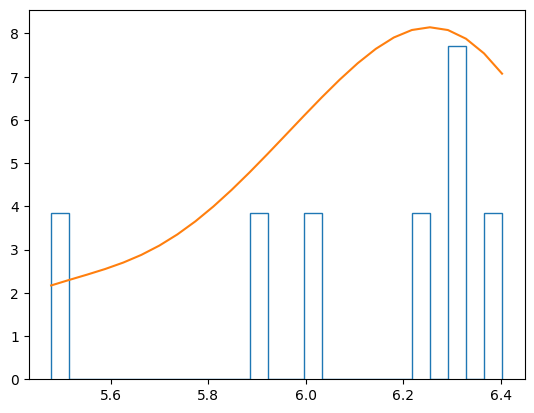



Raíz cúbica
Raíz cúbica skewness: -1.3003155607723278
Raíz cúbica kurtosis: 1.3389818259202473


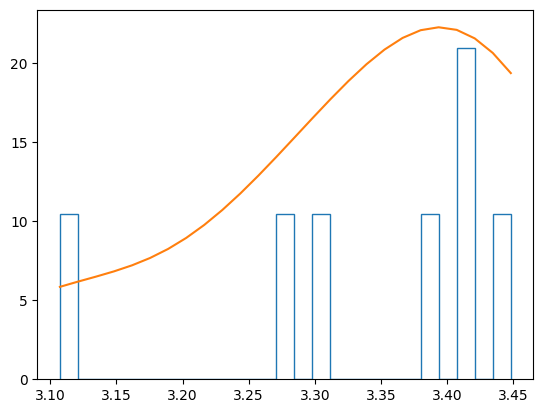



Logaritmo
Logaritmo skewness: -1.3535001366170503
Logaritmo kurtosis: 1.543787819461814


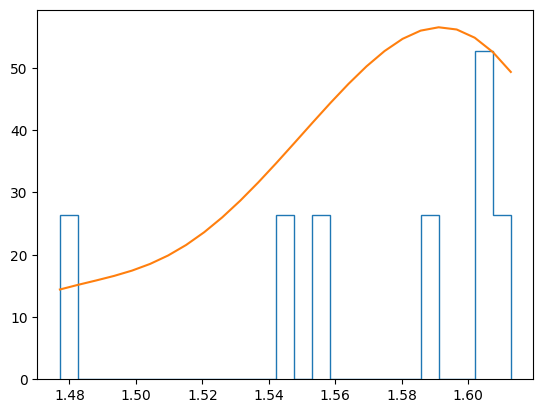



Cuadrado
Cuadrado skewness: -1.0395132200703212
Cuadrado kurtosis: 0.38433733170804985


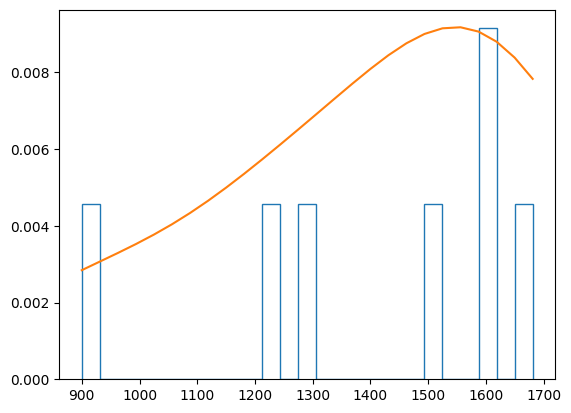

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})

hours = df['Hours']
df["Raíz cuadrada"] = np.sqrt(hours)
df["Raíz cúbica"] = np.cbrt(hours)
df["Logaritmo"] = np.log10(hours)
df["Cuadrado"] = np.square(hours)

numcols = ["Raíz cuadrada", "Raíz cúbica", "Logaritmo", "Cuadrado"]

print(df[numcols])

for col in numcols:
    print(df[col].name)
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', density=True, bins=25)
    plt.plot(x, density(x)*7)
    plt.show()
    print('\n')


Parece que la transformación que mejor se adapta en simetría es la de elevar al cuadrado

Probemos ahora con una distribución sesgada hacia el lado izquierdo


Raíz cuadrada
Raíz cuadrada skewness: 0.6466363822916701
Raíz cuadrada kurtosis: -1.3005114584611395


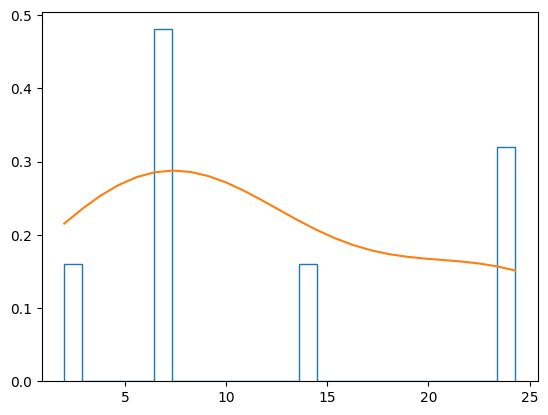



Raíz cúbica
Raíz cúbica skewness: 0.35173821875081823
Raíz cúbica kurtosis: -1.1739631698939217


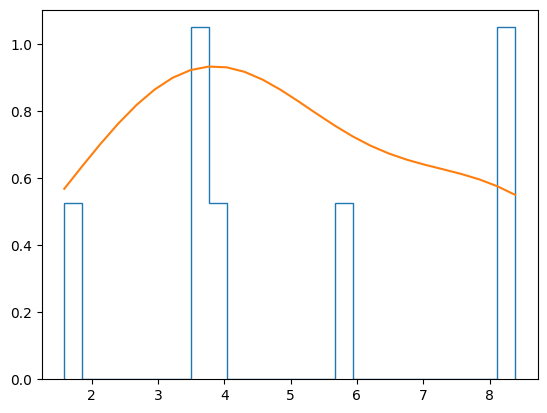



Logaritmo
Logaritmo skewness: -0.669683673653464
Logaritmo kurtosis: 0.5385785432597361


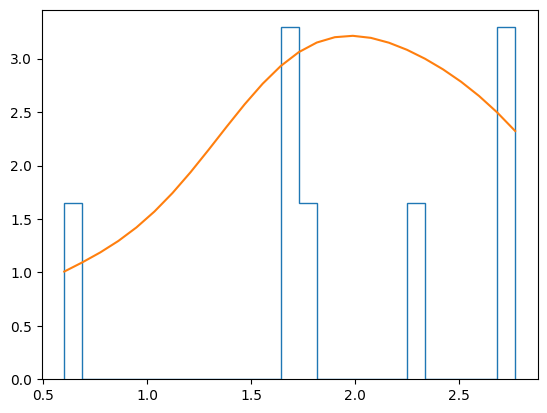



Cuadrado
Cuadrado skewness: 1.2343330712767013
Cuadrado kurtosis: -0.676193646641944


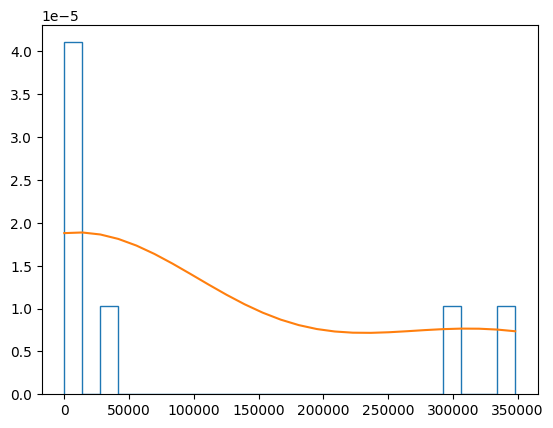

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[50,54,50,189,550,4,590]})

hours = df['Hours']
df["Raíz cuadrada"] = np.sqrt(hours)
df["Raíz cúbica"] = np.cbrt(hours)
df["Logaritmo"] = np.log10(hours)
df["Cuadrado"] = np.square(hours)

numcols = ["Raíz cuadrada", "Raíz cúbica", "Logaritmo", "Cuadrado"]

for col in numcols:
    print(df[col].name)
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', density=True, bins=25)
    plt.plot(x, density(x)*7)
    plt.show()
    print('\n')

En este caso parece ser la transformación raíz cúbica la que menor asimetría nos da


### Tratamiento de outliers
Si a pesar de las transformaciones anteriores (o en el caso de que no queramos efectuarlas) todavía nos quedan valores muy distantes de los demás podemos optar por alguna de las siguientes soluciones para esos datos:


> Eliminarlos

> Imputarles otro valor (el percentil 5% o 95% por ejemplo)

El siguiente código se podría usar para eliminar outliers

In [10]:
q_low = df['Hours'].quantile(0.01)
q_hi  = df['Hours'].quantile(0.99)


df_filtrado = df[(df['Hours'] < q_hi) & (df['Hours'] > q_low)]
df_filtrado

,Name,Hours,Raíz cuadrada,Raíz cúbica,Logaritmo,Cuadrado
0,Dan,50,7.071068,3.684031,1.698970,2500
1,Joann,54,7.348469,3.779763,1.732394,2916
2,Pedro,50,7.071068,3.684031,1.698970,2500
3,Rosie,189,13.747727,5.738794,2.276462,35721
4,Ethan,550,23.452079,8.193213,2.740363,302500


O mejor incluso basarse en el valor **Z-score** para la operación. Recuerda que Z-score es una medida estadística que nos dice qué tan lejos o cerca está un valor del promedio de un grupo de valores, mide la "normalidad" usando las desviaciones estándar como unidad de medida. 

| **Z-Score**    | **Interpretación**                                                                                                      |
|----------------|-------------------------------------------------------------------------------------------------------------------------|
| **Z-Score = 0**| Indica que el valor está **exactamente en la media**. El 50% de los datos están por debajo de la media y el 50% por encima. |
| **Z-Score Positivo (+)** | Los valores **positivos** indican que el valor está **por encima de la media**.                                           |
| **Z-Score Negativo (-)** | Los valores **negativos** indican que el valor está **por debajo de la media**.                                           |

In [25]:
import pandas as pd
import numpy as np
import scipy.stats as stats


df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[50,54,50,189,550,4,590]})


df['Z-Score'] = stats.zscore(df['Hours'])
df

,Name,Hours,Z-Score
0,Dan,50,-0.698638
1,Joann,54,-0.681433
2,Pedro,50,-0.698638
3,Rosie,189,-0.100771
4,Ethan,550,1.451962
5,Vicky,4,-0.896493
6,Frederic,590,1.624010


### Datos con campos nulos
En caso de encontrarnos con datos faltantes podemos optar por suprimir esos registros (si nuestra fuente de datos es abundante) o bien imputarles un valor (la media o la mediana suele ser un buen valor candidato)



In [ ]:

df['col_filtrada'] = df['col'].fillna( df['col'].mean()) # Imputando los valores perdidos por la media
df['col_filtrada'] = df['col'].fillna( df['col'].median()) # Imputando los valores perdidos por la mediana


En sklearn también hay funciones especializadas en la imputación (SimpleImputer, KNNImputer,  ...) 

In [ ]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)
neighbors = knn.fit_transform(data)

### Escalado de características

El escalado o **normalización** se refiere al ajuste de los valores medidos en diferentes escalas respecto a una escala común. Es decir, ajusta todas las columnas al mismo rango.

Comentamos dos técnicas de escalado que utilizaremos: Min-Max Scaling y Z-Score Scaling (Estandarización Z-Score)


#### Min Max Scaling

En este caso lo que se hace con los datos es que se escalan para que todos estén en un rango entre 0 y 1. Es sensible a los outliers. Útil cuando las características tienen distribuciones similares. Por ejemplo, cuando se usa un algoritmo basado en redes neuronales o KNN.

La transformación es:
$$Xstd = \frac{(X - X.min)}{(X.max - X.min)}$$

Sklearn tiene un transformador llamado MinMaxScaler y un hiperparámetro feature_range que permite cambiar el rango. 


En este caso lo que se hace con los datos es que se escalan para que todos estén en un rango entre 0 y 1. Es sensible a los outliers. Útil cuando las características tienen distribuciones similares. Por ejemplo, cuando se usa un algoritmo basado en redes neuronales o KNN.

In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# define data
data = ([[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]])
print(data)
# define min max scaler
#scaler = MinMaxScaler()   
scaler = MinMaxScaler(feature_range=(-1,1))
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]]
[[ 1.         -1.        ]
 [-0.91666667 -0.01010101]
 [-0.04166667 -0.91919192]
 [ 0.75        0.39393939]
 [-1.          1.        ]]


En nuestro ejemplo con los valores escalados entre 0 y 1:

In [30]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[50, 54, 50, 189, 550, 4, 590]})

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador y transformar los datos
df['Horas_escaladas'] = scaler.fit_transform(df[['Hours']])


print(df)

       Name  Hours  Horas_escaladas
0       Dan     50         0.078498
1     Joann     54         0.085324
2     Pedro     50         0.078498
3     Rosie    189         0.315700
4     Ethan    550         0.931741
5     Vicky      4         0.000000
6  Frederic    590         1.000000


#### Estandarización Z-Score
En este caso podemos estandarizar una expresión numérica mediante z-score. Ideal cuando los datos tienen distribuciones normales o guassianas y el modelo es sensible a la varianza(como en regresión lineal, SVM, redes neuronales,..) No es sensible a los outliers porque usa la desviación estándar.

Sklearn tiene un transformador llamado StandardScaler para la estandarización. Funciona de la siguiente forma: primero se resta el valor medio (así los normalizados tienen de media 0) y luego se divide por la desviación estándar(así los valores normalizados tienen desviación estándar 1)

In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours': [50, 54, 50, 189, 550, 4, 590]})

# Creamos el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos (escalado de la columna 'Hours')
df['Horas_estandarizadas'] = scaler.fit_transform(df[['Hours']])

df

,Name,Hours,Horas_estandarizadas
0,Dan,50,-0.698638
1,Joann,54,-0.681433
2,Pedro,50,-0.698638
3,Rosie,189,-0.100771
4,Ethan,550,1.451962
5,Vicky,4,-0.896493
6,Frederic,590,1.624010


Ahora que están los datos estandarizados vemos que el valor de Ehtan que eran 550 horas, ahora tiene un valor de 1.45 y eso significa que está 1.45 desviaciones estándar por encima de la media de los datos. Esto significa que está trabajando muchas más horas que la mayoría del resto de personas.